# Main notebook for COVID-19 detection in children

## Authors:

- Marc Garcia
- Jofre Poch
- Pau Tarragó
- Pau Matas
- Tomás Gadea

## Summary of steps for the project:
- **Exploratory Data Analysis (EDA)**: entendre les dades


- **Data Cleaning**: treure NULLs, eliminar dades no importants, etc.


- **Feature Selection**: escollir les variables explicatives que li passarem al model


- **Model selection**: Escollir un model classificador (té covid o no; si té covid => PCR, si no => pa casa)


- **Model training**: entrenar el model, és copiar 4 linies de codi xd


- **Model Validation**: Veure com de bé ho ha fet. Per exemple veient els square errors de valors predits vs resposta de veritat.


- **Parameter tunning**: Canviar els paràmetres per millorar el model validation.

## Actual work:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [3]:
path = './COPEDICATClinicSympt_DATA_2020-12-17_1642.csv'
df = pd.read_csv(path)
df.head()

,participant_id,id,sex,recruit_date,postal_code,province,family_country,row_school,bus,sports_type,...,other,flu_binary,flu_date,vaccines_binary,comorbidities_complete,final_classification_of_th,survey_end_date,name_initials_of_the_inter,comments,final_outcome_complete
0,1,HVH-0001-78,1.0,2020-11-09,08025,1.0,296.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,2.0,2020-11-09,ASA,NaN,2
1,2,HVH-0002-78,2.0,2020-11-14,08012,1.0,302.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,2.0,2020-11-14,ASA,NaN,2
2,3,HVH-0003-78,1.0,2020-11-16,NaN,1.0,314.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,1.0,2020-11-16,ASA,Amigdalitis estreptocòcica,2
3,4,HVH-0004-78,2.0,2020-11-30,NaN,1.0,416.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,2.0,2020-12-01,ASA,NaN,2
4,5,HVH-0005-78,2.0,2020-12-16,08016,1.0,269.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,1.0,2020-12-16,ASA,NaN,2


In [4]:
# EDA:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset has 1681 rows and 197 columns.


<IPython.core.display.Javascript object>


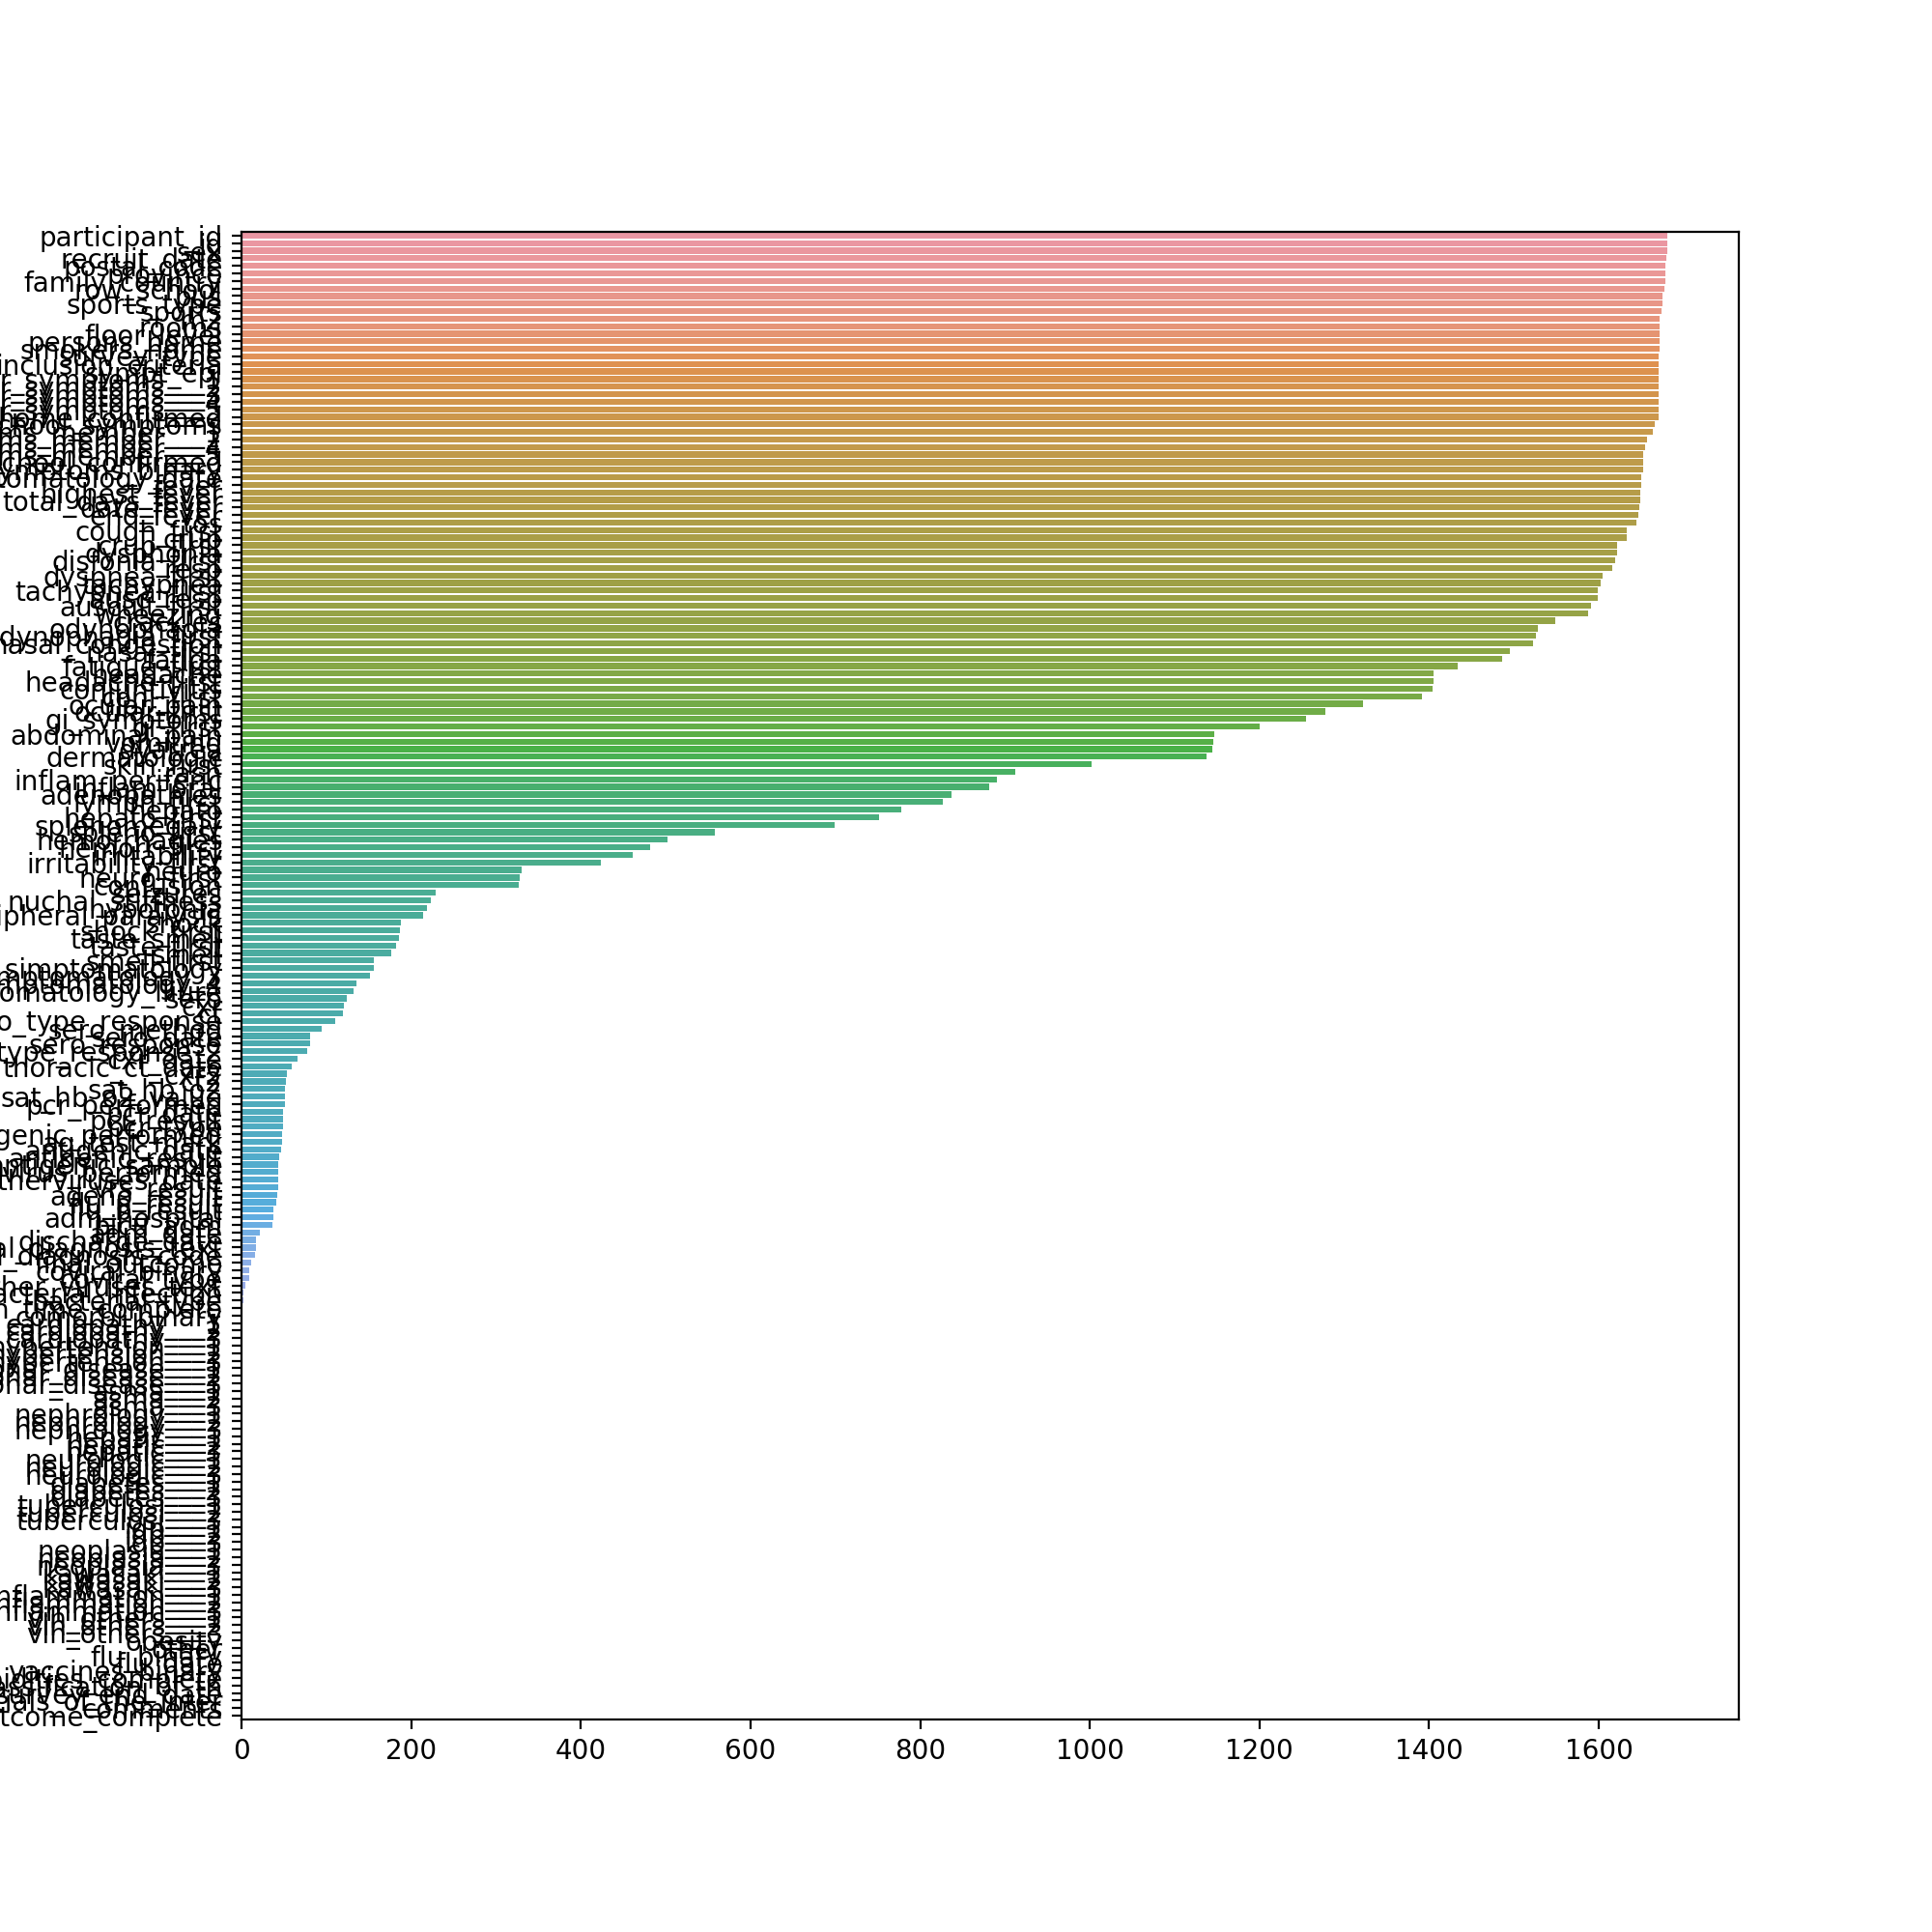

In [5]:
plt.figure(figsize=(10, 10))
nulls = df.isnull().sum().sort_values(ascending=False)
sns.barplot(y=df.columns, x=nulls)

In [6]:
# filter numerical variables only
impactful_variables = []
for column in df.columns:
    if (df.dtypes[column] in ['float64', 'int64']):
        impactful_variables.append(column)

df = df[impactful_variables]
len(df.columns)

165

3.0    1362
1.0     178
2.0      75
Name: final_diagnosis_code, dtype: int64


<IPython.core.display.Javascript object>


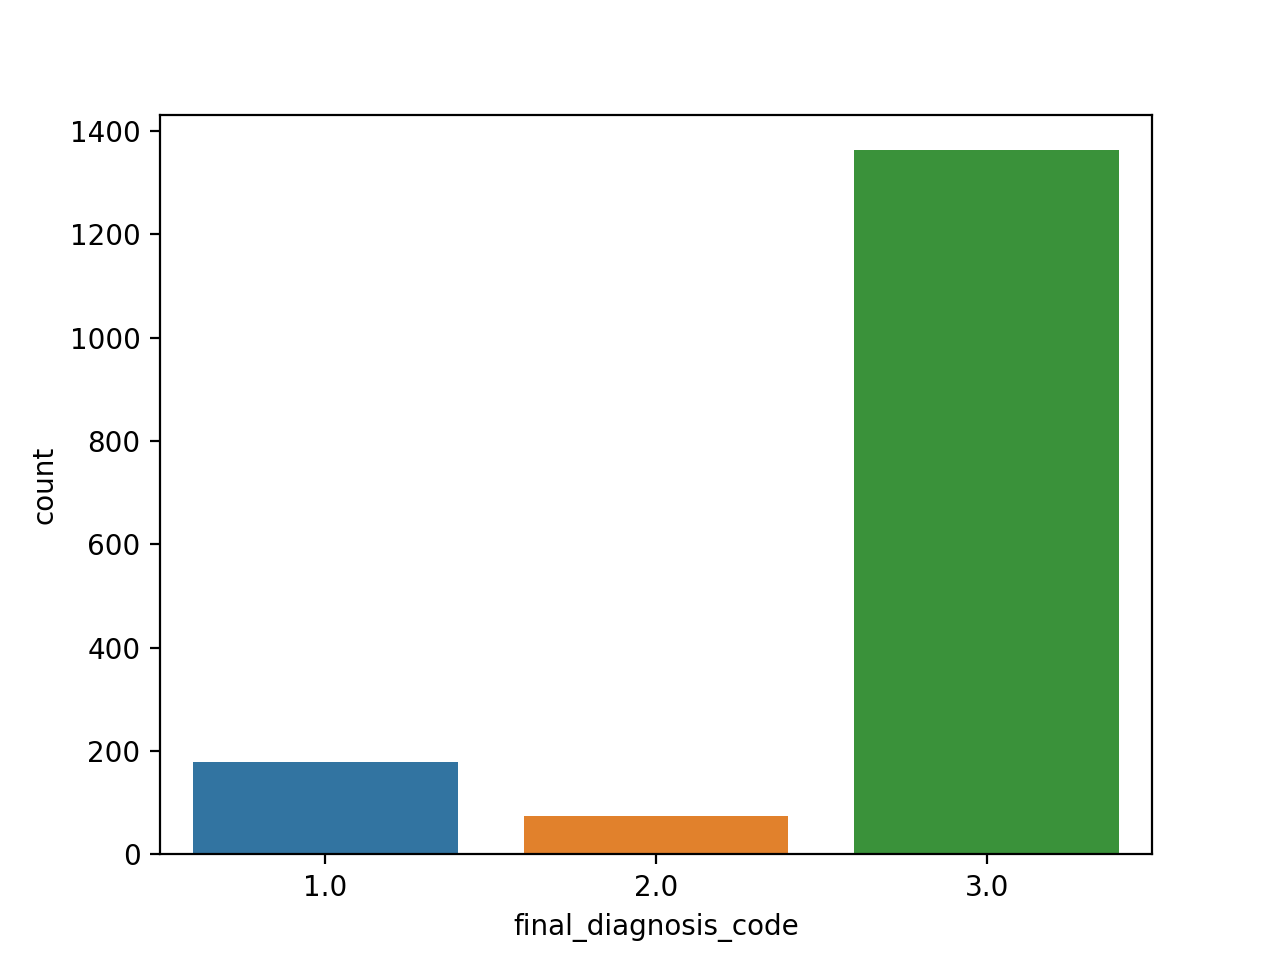

In [7]:
# Response distribution

Y = df['final_diagnosis_code']
print(Y.value_counts())
plt.figure()
sns.countplot('final_diagnosis_code',data=df)

<IPython.core.display.Javascript object>


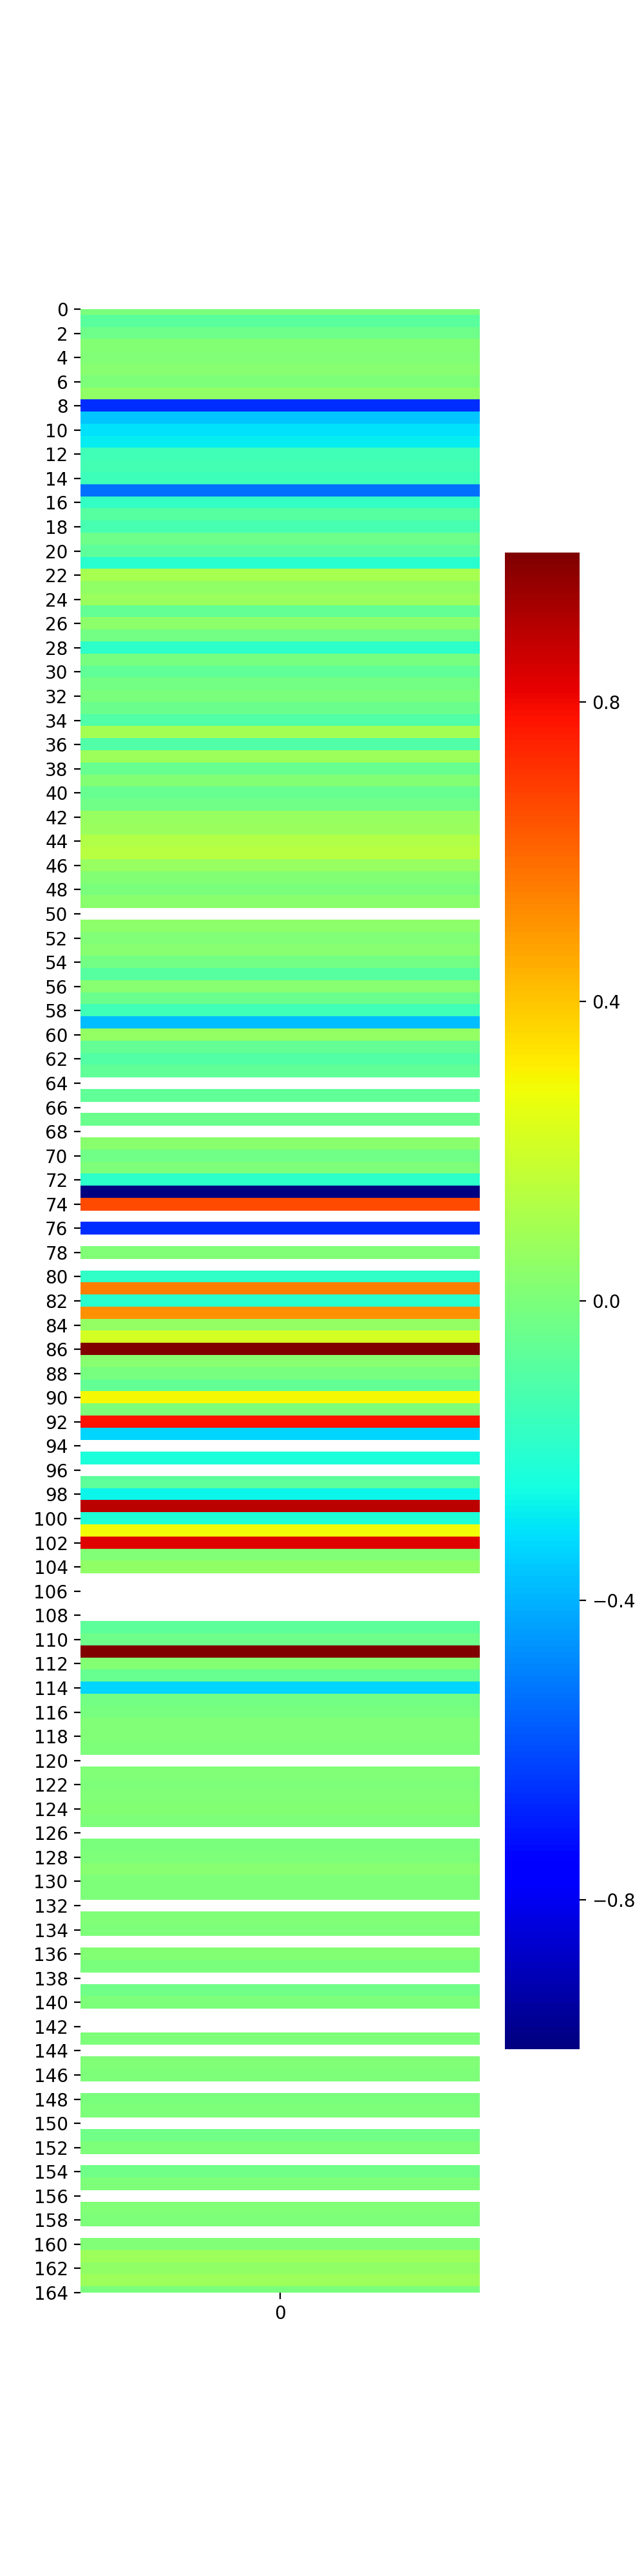

In [8]:
klk = np.asarray(df.corr()['final_diagnosis_code']).reshape(165,1)
plt.figure(figsize=(5, 20))
sns.heatmap(klk, annot=False, fmt="g", cmap='jet')

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

data = pd.read_csv("clean_data.csv")
diagnosis = pd.read_csv("diagnosis_data.csv")

def test_hipotesis(column, data):
    clean_list1, clean_list2 = [], []
    a, b = np.array(data[column]), np.array(diagnosis['final_diagnosis_code'])
    for i in range(len(a)):
        if not np.isnan(a[i]) and not np.isnan(b[i]):
            clean_list1.append(a[i])
            clean_list2.append(b[i])
    if not clean_list1 or np.all(clean_list1 == clean_list1[0]) or np.all(clean_list2 == clean_list2[0]): # casos en el cas no hi ha cap valor numeric o es te una array uniforme
        return False
    stat, pval = stats.pearsonr(clean_list1, clean_list2)
    #print(column, pval)
    return pval < 0.05

impactful_variables = []
for column in data.columns:
    if (data.dtypes[column] in ['float64', 'int64']):
        if (test_hipotesis(column, data)):
            impactful_variables.append(column)

#print(impactful_variables)


y = diagnosis['final_diagnosis_code']
X = data.loc[:,impactful_variables]
#X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)


In [19]:
N = len(X)
N

1540

In [29]:
y.shape

(1540,)

In [31]:
y.iloc[:N//2]

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
765    3.0
766    3.0
767    3.0
768    3.0
769    3.0
Name: final_diagnosis_code, Length: 770, dtype: float64

<IPython.core.display.Javascript object>


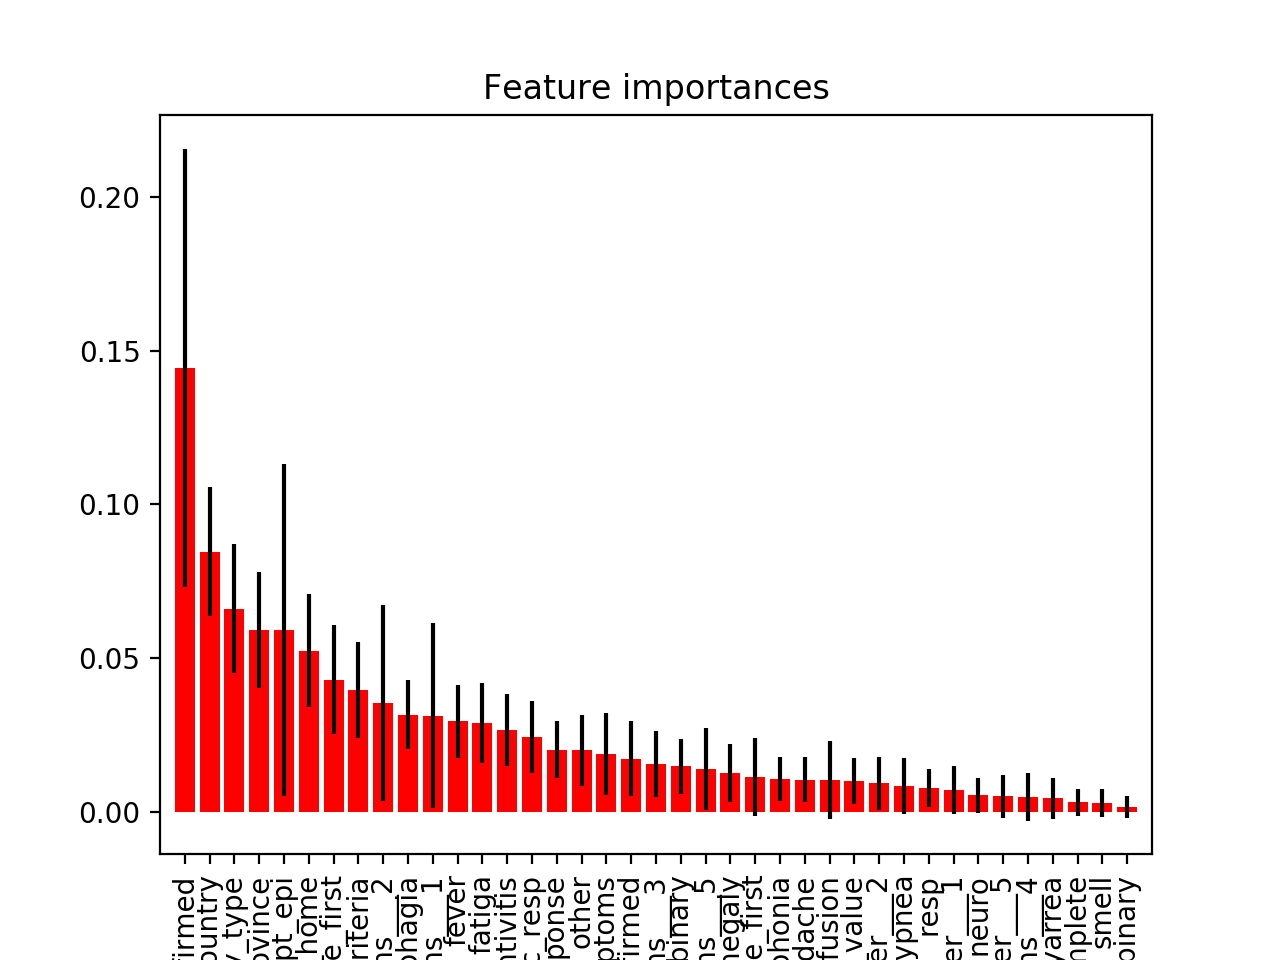

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import model_training as mdt


data = pd.read_csv("clean_data.csv")
diagnosis = pd.read_csv("diagnosis_data.csv")
feat = ['province', 'family_country', 'smokers_home', 'survey_type', 'inclusion_criteria', 'sympt_epi', 'housemember_symptoms___1', 'housemember_symptoms___2', 'housemember_symptoms___3', 'housemember_symptoms___4', 'housemember_symptoms___5', 'home_confirmed', 'school_symptoms', 'school_symptoms_member___1', 'school_symptoms_member___2', 'school_symptoms_member___5', 'school_confirmed', 'symptoms_binary', 'fever', 'dysphonia', 'resp', 'tachypnea', 'ausc_resp', 'odynophagia', 'fatiga', 'fatigue_first', 'headache', 'conjuntivitis', 'dyarrea', 'splenomegaly', 'neuro', 'confusion', 'taste_first', 'smell', 'sero_response', 'sat_hb_o2_value', 'other', 'vaccines_binary', 'comorbidities_complete']

y = diagnosis['final_diagnosis_code']
X = data.loc[:,feat]


forest = mdt.get_model()

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



llista = [feat[i] for i in indices]

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), llista, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()
